In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)
#sns.set_theme(style="whitegrid")

In [19]:
import iterative_params as ip
ip.replicate_file("CHIMES_0.6/Data/TemplateColzi/colzi_Param.dat","CHIMES_0.6/Data/AvColzi.in")

FileNotFoundError: [Errno 2] No such file or directory: 'CHIMES_0.6/Data/AvColzi.in'

In [2]:
def reformat_grah_file(name_in,name_out):
    with open(name_out,"w") as k:
        with open(name_in,"r") as f:
            while True:
                line = f.readline()
                if(not line):
                    break
                line=line.strip()
                k.write(",".join(line.split()).strip()+"\n")


def get_graph_data(pref,name,ab_list=None,include_t = True):
    reformat_grah_file(pref+name+"/"+name+".graph",pref+name+"/"+name+"_rf.graph")
    data = pd.read_csv(pref+name+"/"+name+"_rf.graph",sep=",",engine="python")
    col_list = []
    if not ab_list:
        return data
    elif include_t:
        col_list.append("t(Myrs)")
    col_list = ["t(Myrs)"]+["t(yrs)"] + ab_list 
    data.drop(data.tail(1).index,inplace=True) # drop last n=1 rows (supressing final drop (???) )
    data.drop(data.head(1).index,inplace=True) # drop first n=1 rows (supressing initial peak (???) )
    data["t(yrs)"] = data["t(Myrs)"]*1e6
    return data[col_list]

def get_deriv_data(pref,name,ab_list=None,include_t = True):
    reformat_grah_file(pref+name+"/"+name+".deriv",pref+name+"/"+name+"_rf.deriv")
    data = pd.read_csv(pref+name+"/"+name+"_rf.deriv",sep=",",engine="python")
    col_list = []
    if not ab_list:
        return data
    elif include_t:
        col_list.append("t(Myrs)")
    col_list = ["t(Myrs)"]+["t(yrs)"] + ab_list 
    data.drop(data.tail(1).index,inplace=True) # drop last n=1 rows (supressing final drop (???) )
    data.drop(data.head(1).index,inplace=True) # drop first n=1 rows (supressing initial peak (???) )
    data["t(yrs)"] = data["t(Myrs)"]*1e6
    return data[col_list]


def get_log_values(logpath,to_text = False):
    
    ans = {}
    sc = None
    with open(logpath,"r") as f:
        while True:
            line = f.readline()
            if(not line):
                break
            if "---" in line:
                continue
            line = line.strip()
            if(line.startswith("*")):
                sc = line.split()[-1]
                ans[sc]={}
                if(to_text):
                    ans[sc]=""
            else:
                if(to_text):
                    ans[sc] = ans[sc] + "| " +line + " |   "
                else:
                    ln = line.split(":")
                    ans[sc][ln[0].strip()] = float(ln[1].strip())
    
    
    return ans


    

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


['final_1215_1  c:6.669e-05  c+:3.300e-04  o:3.967e-04\n', 'final_1215_2  c:1.217e-05  c+:1.929e-05  o:3.147e-05\n', 'final_1215_3  c:1.091e-06  c+:5.079e-05  o:5.188e-05\n', 'final_1215_4  c:2.918e-06  c+:4.891e-06  o:7.809e-06\n', 'final_1215_5  c:1.085e-04  c+:1.546e-04  o:2.631e-04\n', 'final_1215_6  c:5.589e-06  c+:1.501e-05  o:2.060e-05\n', 'final_1215_7  c:4.911e-04  c+:1.960e-05  o:5.107e-04\n', 'final_1215_8  c:1.297e-06  c+:5.497e-04  o:5.510e-04\n', 'final_1215_9  c:4.490e-06  c+:1.105e-04  o:1.150e-04\n', 'final_1215_10  c:1.946e-04  c+:1.129e-06  o:1.958e-04\n', 'final_1215_11  c:6.539e-04  c+:2.794e-04  o:9.332e-04\n', 'final_1215_12  c:1.447e-05  c+:4.343e-04  o:4.487e-04\n', 'final_1215_13  c:2.191e-05  c+:3.631e-06  o:2.554e-05\n', 'final_1215_14  c:1.539e-06  c+:8.339e-04  o:8.355e-04\n', 'final_1215_15  c:6.561e-04  c+:7.914e-05  o:7.352e-04\n', 'final_1215_16  c:1.697e-06  c+:1.072e-05  o:1.242e-05\n', 'final_1215_17  c:4.547e-04  c+:2.907e-06  o:4.576e-04\n', 'fina

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


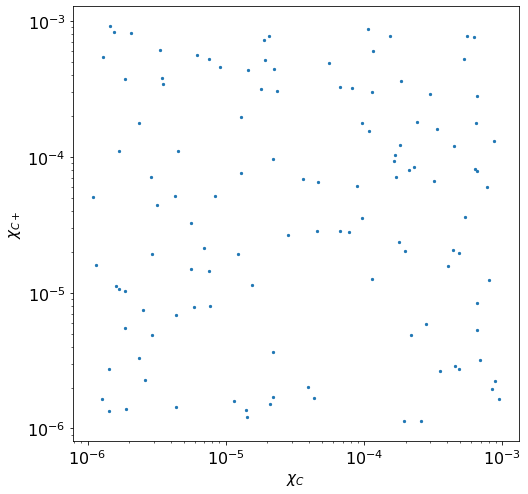

In [3]:
def plot_info(path_info,path_img):
    lines =[]
    with open(path_info,"r") as f:
        lines = f.readlines()
    
    lines = [l for  l in lines if not l.startswith("#")]
    print(lines)
    lines = [l.split()[1:] for l in lines]
    x,y = np.array([[float(l[0].split(":")[1]),float(l[1].split(":")[1])] for l in lines]).T
    
    
    #PLOTTING
    plt.figure(figsize=(8,8))
    plt.scatter(x,y,s=5)
    plt.xlabel("$\chi_C$",fontsize=15)
    plt.ylabel("$\chi_{C+}$",fontsize=15)
    plt.xscale("log")
    plt.yscale("log")
    plt.savefig(path_img,bbox_inches="tight")
    
    return x,y
    

x,y=plot_info("CHIMES_0.6/Out/final_1215/final_1215.info","")   

In [3]:
pref = "CHIMES_0.6/Out/"
interest_ab = ["h","h2","hcn+","hcn","oh","h3+","h2o","c","co","nh3","electr","h2o+","c-c3h","ch4","ch2","hnc","cn","ch","hco+","s","co2","c+","ch4","sh","h+","h2+","c4h2","ch5o+","o2"]


In [17]:
plt.close()

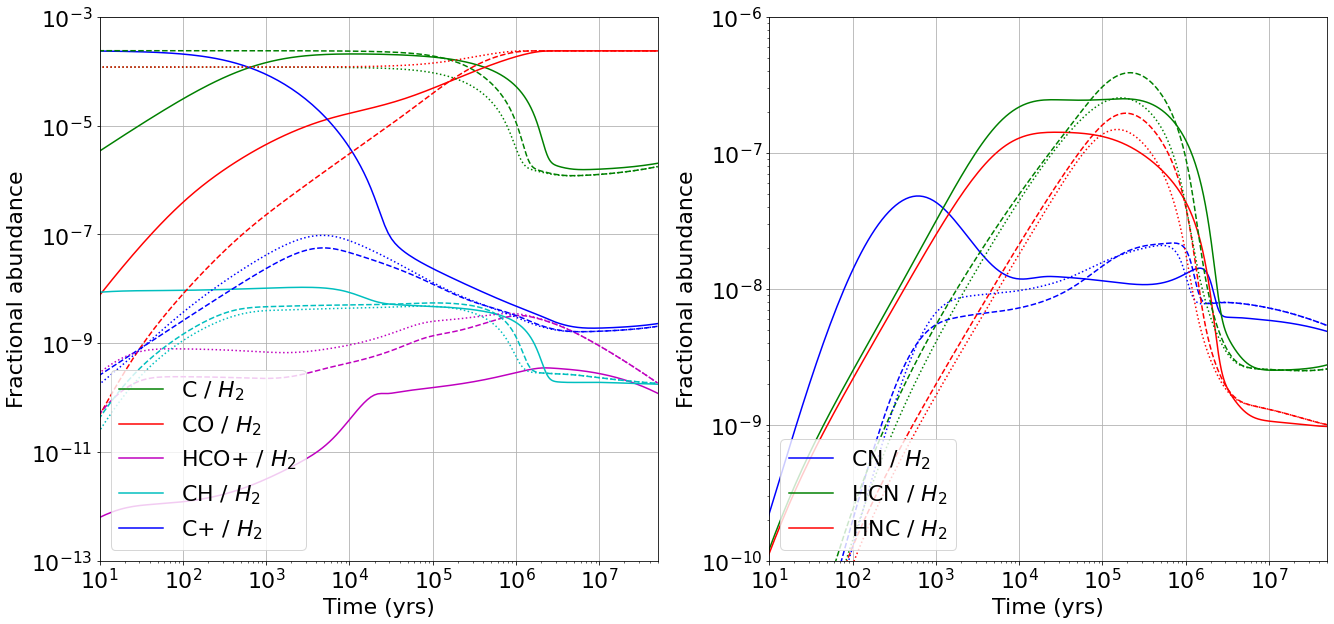

In [15]:
fs_ = 22
plt.figure(figsize=(22,10))
plt.subplot(1,2,2)
sc_colzi = "iterCorr4" # colzi paper, all C in C+ ()
ddbb_colzi = get_graph_data(pref,sc_colzi,ab_list=interest_ab)

sc_colzi_c = "iterCorr5"
ddbb_colzi_c = get_graph_data(pref,sc_colzi_c,ab_list=interest_ab)

sc_colzi_co = "iterCorr6"
ddbb_colzi_co = get_graph_data(pref,sc_colzi_co,ab_list=interest_ab)
#plt.title(reff_vals[sc],fontsize = 15)

reff_vals = get_log_values("CHIMES_0.6/Data/log_itercorr.log",True)

plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["cn"]/ddbb_colzi["h2"],c="b",label="CN / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["hcn"]/ddbb_colzi["h2"],c="g",label="HCN / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["hnc"]/ddbb_colzi["h2"],c="r",label="HNC / $H_2$")

plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["cn"]/ddbb_colzi_c["h2"],c="b",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["hcn"]/ddbb_colzi_c["h2"],c="g",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["hnc"]/ddbb_colzi_c["h2"],c="r",linestyle="--")


plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["cn"]/ddbb_colzi_co["h2"],c="b",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["hcn"]/ddbb_colzi_co["h2"],c="g",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["hnc"]/ddbb_colzi_co["h2"],c="r",linestyle=":")
plt.xlabel("Time (yrs)",fontsize=fs_)
plt.ylabel("Fractional abundance",fontsize=fs_)
plt.yscale("log")
plt.xlim(10,5e7)
plt.xscale("log")
plt.ylim(1e-10,1e-6)
plt.legend(loc=3)
plt.grid()
#plt.tick_params(labeltop=True, labelright=True)

plt.subplot(1,2,1)


#plt.title(reff_vals[sc],fontsize = 15)
# C+ (-)
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["c"]/ddbb_colzi["h2"],c="g",label="C / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["co"]/ddbb_colzi["h2"],c="r",label="CO / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["hco+"]/ddbb_colzi["h2"],c="m",label="HCO+ / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["ch"]/ddbb_colzi["h2"],c="c",label="CH / $H_2$")
plt.plot(ddbb_colzi["t(yrs)"],ddbb_colzi["c+"]/ddbb_colzi["h2"],c="b",label="C+ / $H_2$")
# C (--)
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["c"]/ddbb_colzi_c["h2"],c="g",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["co"]/ddbb_colzi_c["h2"],c="r",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["hco+"]/ddbb_colzi_c["h2"],c="m",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["ch"]/ddbb_colzi_c["h2"],c="c",linestyle="--")
plt.plot(ddbb_colzi_c["t(yrs)"],ddbb_colzi_c["c+"]/ddbb_colzi_c["h2"],c="b",linestyle="--")
# CO (:)
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["c"]/ddbb_colzi_co["h2"],c="g",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["co"]/ddbb_colzi_co["h2"],c="r",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["hco+"]/ddbb_colzi_co["h2"],c="m",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["ch"]/ddbb_colzi_co["h2"],c="c",linestyle=":")
plt.plot(ddbb_colzi_co["t(yrs)"],ddbb_colzi_co["c+"]/ddbb_colzi_co["h2"],c="b",linestyle=":")


plt.xlabel("Time (yrs)",fontsize=fs_)
plt.ylabel("Fractional abundance",fontsize=fs_)
plt.yscale("log")
plt.xlim(10,5e7)
plt.xscale("log")
plt.ylim(1e-13,1e-3)
plt.legend(loc=3)
plt.grid()
#plt.tick_params(labeltop=True, labelright=True)

In [9]:
ddbb_colzi.columns

Index(['t(Myrs)', 't(yrs)', 'h', 'h2', 'hcn+', 'oh', 'h3+', 'h2o', 'c', 'co',
       'nh3', 'electr', 'h2o+', 'c-c3h', 'ch4', 'ch2', 'hnc', 'cn', 'ch',
       'hco+', 's', 'co2', 'c+', 'ch4', 'sh', 'h+', 'h2+', 'c4h2', 'ch5o+',
       'o2'],
      dtype='object')

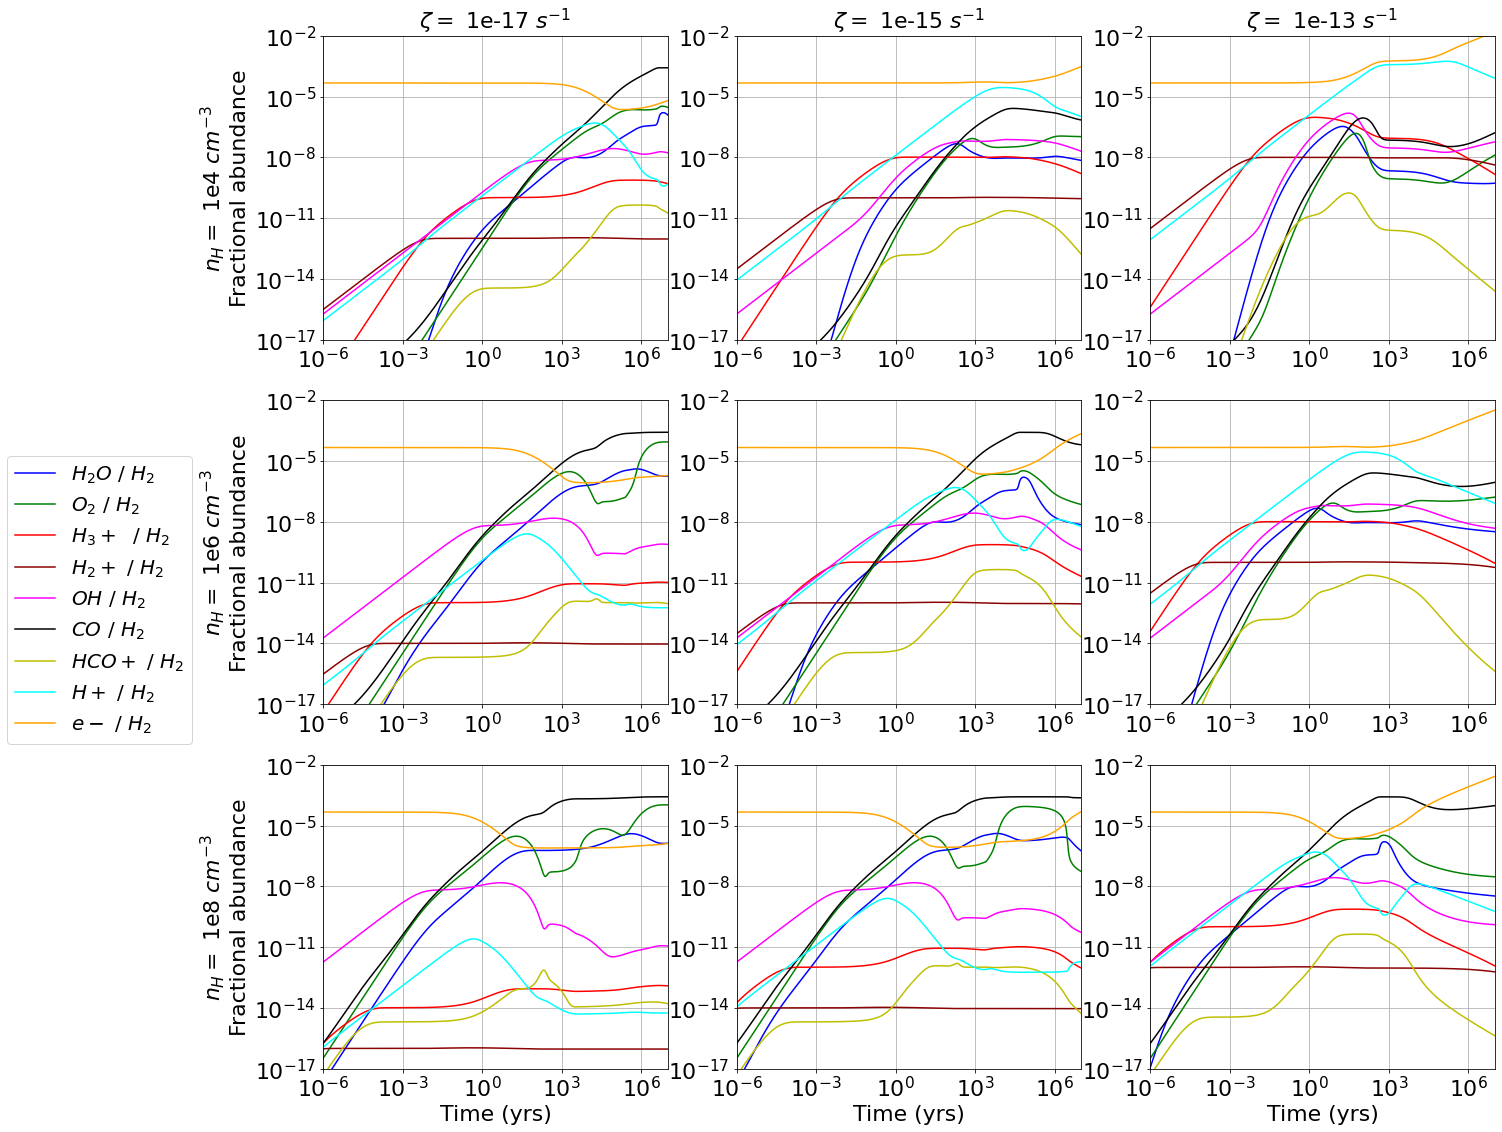

In [10]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)

reff_vals = get_log_values("CHIMES_0.6/Data/log_paramgrid.log",True)
plt.figure(figsize=(21,19))

for i in range(1,10):
    plt.subplot(3,3,i)
    sc = "paramgrid{}".format(i)
    
    ddbb = get_graph_data(pref,sc,ab_list=interest_ab)
    #newtitle =reff_vals[sc].replace("densh","$n_H$").replace("zeta","$\zeta$").replace("|   |","$cm^{-3}$  ").replace("|","").strip()+" $s^{-1}$" 
    if(i<4):
        plt.title("$ \zeta =$ 1e%d $s^{-1}$"%([-17,-15,-13][i-1]),fontsize = 22)
    plt.plot(ddbb["t(yrs)"],ddbb["h2o"]/ddbb["h2"],c="b",label="$H_2O$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["o2"]/ddbb["h2"],c="g",label="$O_2$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h3+"]/ddbb["h2"],c="r",label="$H_3+$  / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h2+"]/ddbb["h2"],c="darkred",label="$H_2+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["oh"]/ddbb["h2"],c="magenta",label="$OH$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["co"]/ddbb["h2"],c="k",label="$CO$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["hco+"]/ddbb["h2"],c="y",label="$HCO+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h+"]/ddbb["h2"],c="cyan",label="$H+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["electr"]/ddbb["h2"],c="orange",label="$e-$ / $H_2$")
    
    
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.ylim(1e-17,1e-2)
    plt.xlim(1e-6,1e7)
    frame1 = plt.gca()
    #if(i<7):
     #   frame1.axes.xaxis.set_ticklabels([])
        
    
    if(i%3==1):
        plt.ylabel("$n_H =$ 1e%d $cm^{-3}$\nFractional abundance"%[4,6,8][int(i/3)],fontsize=22,ha="center")
   # else:
    #    frame1.axes.yaxis.set_ticklabels([])
        
    if(i>6):
        plt.xlabel("Time (yrs)",fontsize=22)
    if(i==4):
        #plt.legend(loc=2)
        plt.legend(bbox_to_anchor=(-0.35, 0.85) ,prop={"size":20})

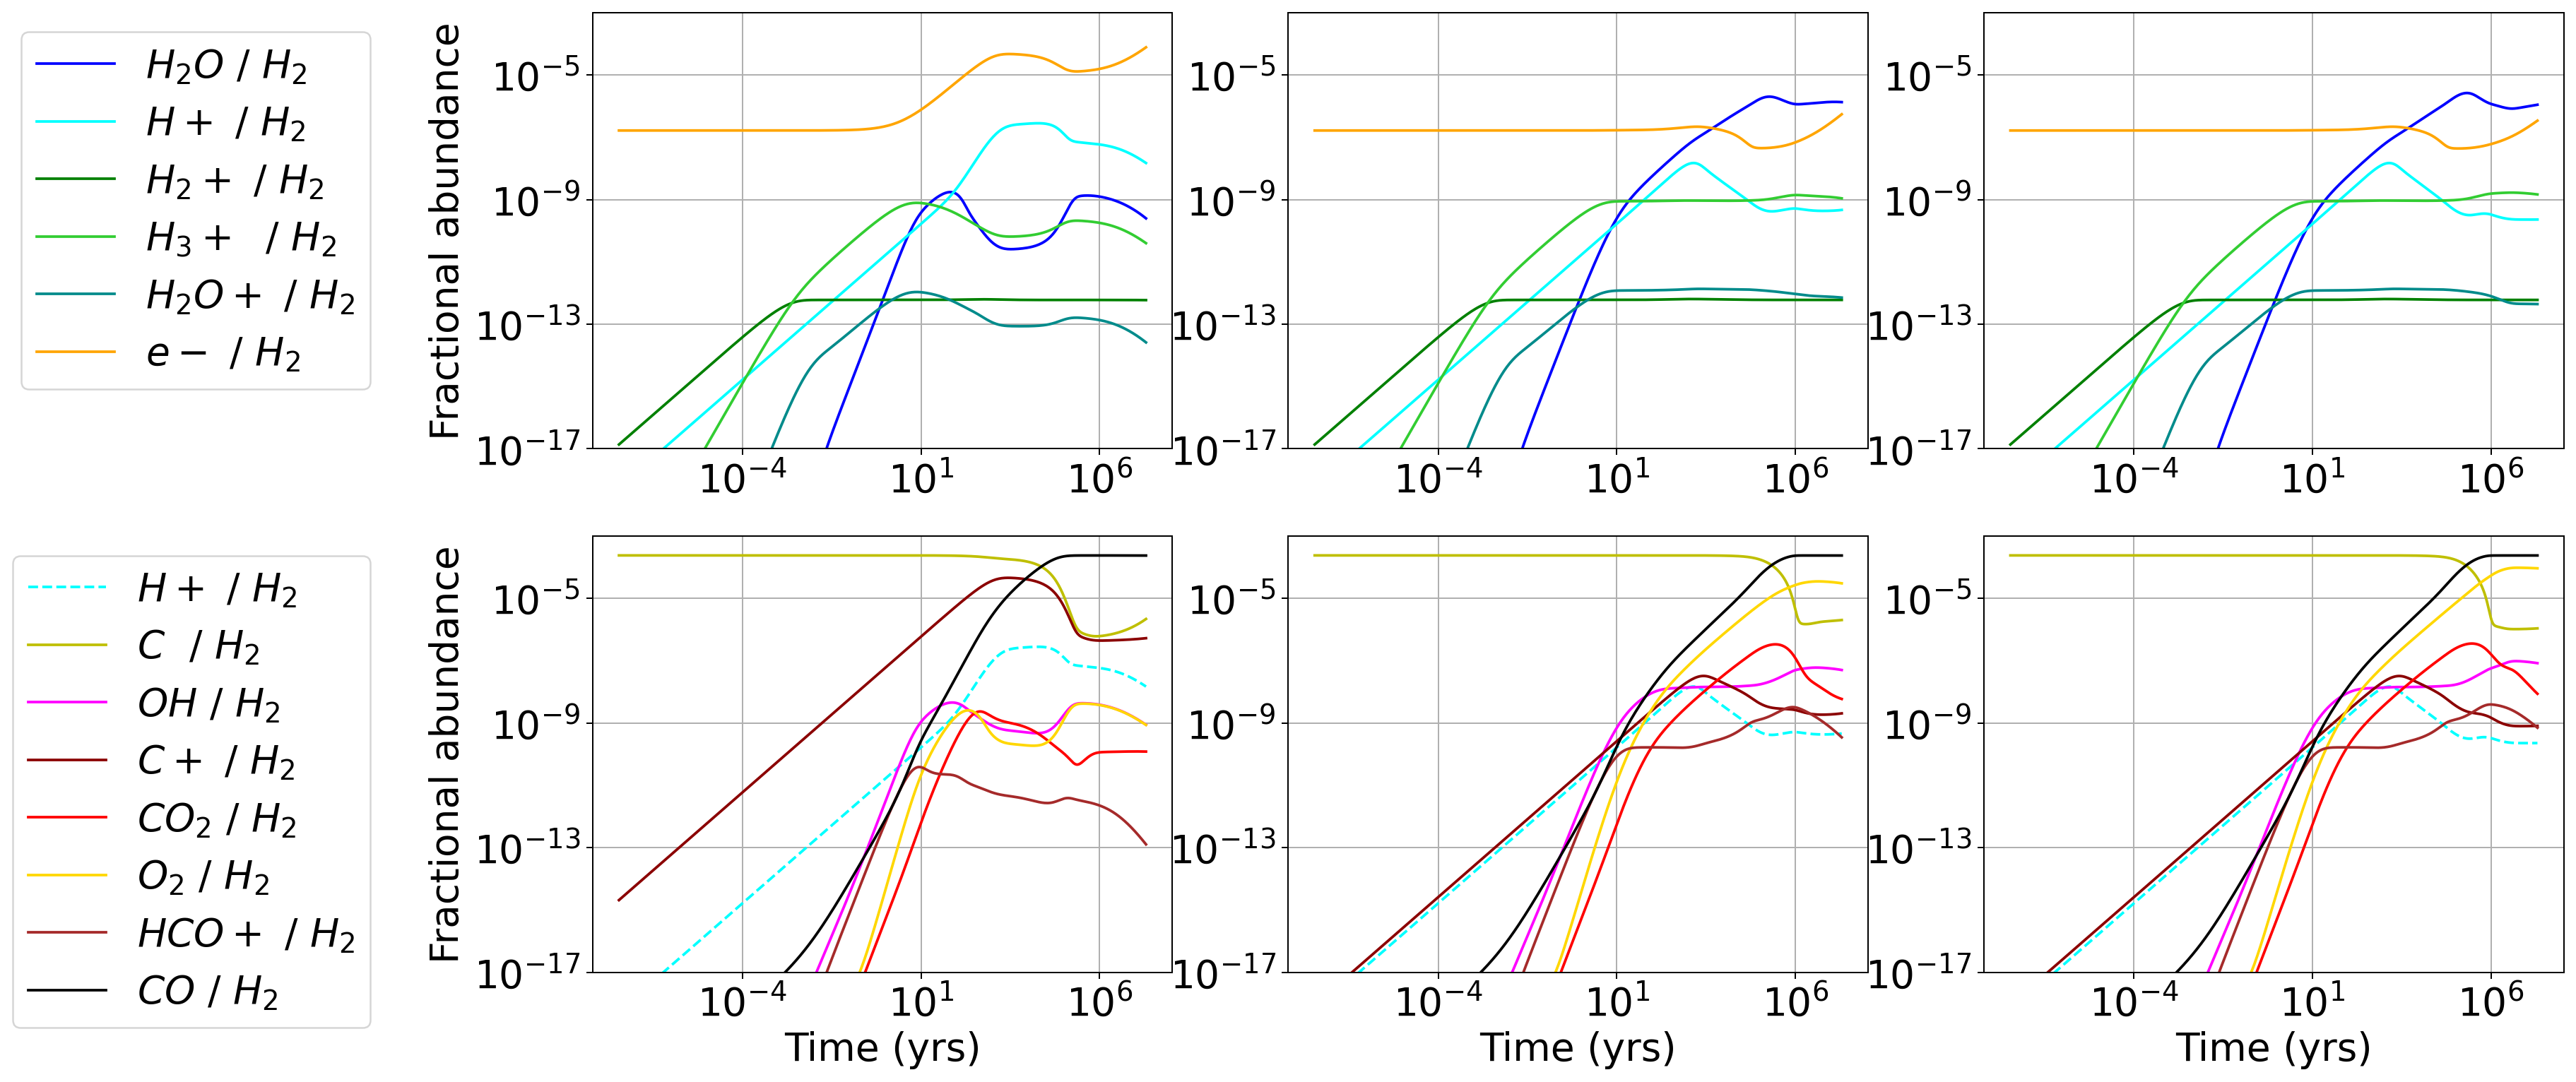

In [13]:

reff_vals = get_log_values("CHIMES_0.6/Data/log_AvColzi.log",True)
plt.figure(figsize=(20,10),dpi=180)

for i in range(1,4):
    plt.subplot(2,3,i)
    sc = "AvColzi{}".format(i)
    ddbb = get_graph_data(pref,sc,ab_list=interest_ab)
    #newtitle =reff_vals[sc].replace("av","$A_v$").replace("|","").strip().split(":")
    #newtitle = " %d mag"%(int(float(newtitle[1])))
 
  #  plt.title(newtitle,fontsize = 14)
    plt.plot(ddbb["t(yrs)"],ddbb["h2o"]/ddbb["h2"],c="blue",label="$H_2O$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h+"]/ddbb["h2"],c="cyan",label="$H+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h2+"]/ddbb["h2"],c="g",label="$H_2+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h3+"]/ddbb["h2"],c="limegreen",label="$H_3+$  / $H_2$")

    plt.plot(ddbb["t(yrs)"],ddbb["h2o+"]/ddbb["h2"],c="darkcyan",label="$H_2O+$ / $H_2$")
    #plt.plot(ddbb["t(yrs)"],ddbb["ch2"]/ddbb["h2"],c="darkred",label="$CH_4$ / $H_2$")
    #plt.plot(ddbb["t(yrs)"],ddbb["co2"]/ddbb["h2"],c="r",label="$CO_2$ / $H_2$")
    #plt.plot(ddbb["t(yrs)"],ddbb["o2"]/ddbb["h2"],c="orangered",label="$O_2$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["electr"]/ddbb["h2"],c="orange",label="$e-$ / $H_2$")
    #plt.xlabel("Time (yrs)",fontsize=12)
    
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.ylim(1e-17,1e-3)
    if(i%3==1):
        plt.legend(loc=2)
        plt.ylabel("Fractional abundance",fontsize=22)
        plt.legend(bbox_to_anchor=(-0.35, 1))
    plt.subplot(2,3,3+i)
    sc = "AvColzi{}".format(i)
    ddbb = get_graph_data(pref,sc,ab_list=interest_ab)
    #newtitle =reff_vals[sc].replace("av","$A_v$").replace("|","").strip()+" $mag$" 
    #plt.title(newtitle,fontsize = 14)
    #plt.plot(ddbb["t(yrs)"],ddbb["h2o+"]/ddbb["h2"],c="b",label="$H_2O+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["h+"]/ddbb["h2"],c="cyan",linestyle="--", label="$H+$ / $H_2$")
    #plt.plot(ddbb["t(yrs)"],ddbb["c"]/ddbb["h2"],c="g",label="$C$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["c"]/ddbb["h2"],c="y",label="$C$  / $H_2$")

    plt.plot(ddbb["t(yrs)"],ddbb["oh"]/ddbb["h2"],c="magenta",label="$OH$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["c+"]/ddbb["h2"],c="darkred",label="$C+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["co2"]/ddbb["h2"],c="r",label="$CO_2$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["o2"]/ddbb["h2"],c="gold",label="$O_2$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["hco+"]/ddbb["h2"],c="brown",label="$HCO+$ / $H_2$")
    plt.plot(ddbb["t(yrs)"],ddbb["co"]/ddbb["h2"],c="k",label="$CO$ / $H_2$")
   
    plt.xlabel("Time (yrs)",fontsize=22)
   
    plt.yscale("log")
    plt.xscale("log")
    plt.grid()
    plt.ylim(1e-17,1e-3)
    if(i%3==1):
        plt.legend(loc=2)
        plt.ylabel("Fractional abundance",fontsize=22)
        #plt.legend(loc=2)
        plt.legend(bbox_to_anchor=(-0.35, 1))
    
    

In [52]:
plt.close()

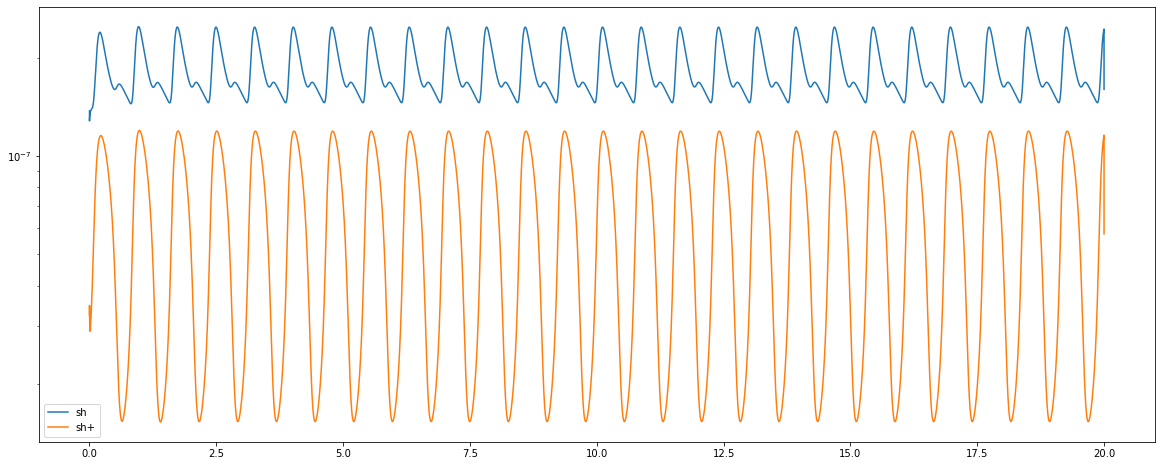

In [10]:
plt.figure(figsize=(20,8))
for l in elems[:10]:
    plt.plot(data2["t(Myrs)"],data2[l],label=l)

plt.yscale("log")
plt.legend()

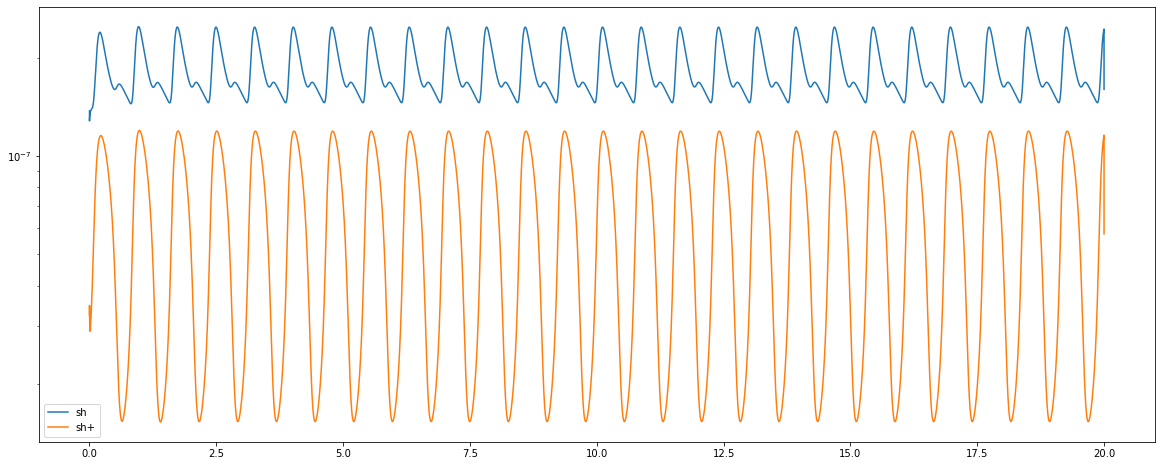

In [11]:
plt.figure(figsize=(20,8))
for l in elems[:10]:
    plt.plot(data2["t(Myrs)"],data2[l],label=l)

plt.yscale("log")
plt.legend()

In [10]:
derivtest = get_deriv_data(pref,"testout")
graphtest = get_graph_data(pref,"testout")

In [11]:
graphtest["t(Myrs)"]

0       3.168877e-14
1       3.485764e-14
2       3.834341e-14
3       4.217775e-14
4       4.639552e-14
            ...     
4282    1.998649e+01
4283    1.999149e+01
4284    1.999649e+01
4285    2.000000e+01
4286    2.000000e+01
Name: t(Myrs), Length: 4287, dtype: float64

In [12]:
derivtest["t(Myrs)"]

0       3.168877e-14
1       3.485764e-14
2       3.834341e-14
3       4.217775e-14
4       4.639552e-14
            ...     
4281    1.998149e+01
4282    1.998649e+01
4283    1.999149e+01
4284    1.999649e+01
4285    2.000000e+01
Name: t(Myrs), Length: 4286, dtype: float64

In [16]:
convfactor = 31556925216000
dt = np.array([ (graphtest["t(Myrs)"][i+1]-graphtest["t(Myrs)"][i]) for i in range(len(graphtest["t(Myrs)"])-1) ])
def manual_deriv(arr):
    return np.array([ (arr[i+1]-arr[i])/dt[i] for i in range(len(arr)-2) ])

In [14]:
derivtest["hco"]

0       4.772246e-22
1       4.772366e-22
2       4.772498e-22
3       4.772643e-22
4       4.772802e-22
            ...     
4281    4.025481e-23
4282    4.025336e-23
4283    4.025191e-23
4284    4.025045e-23
4285    4.024942e-23
Name: hco, Length: 4286, dtype: float64

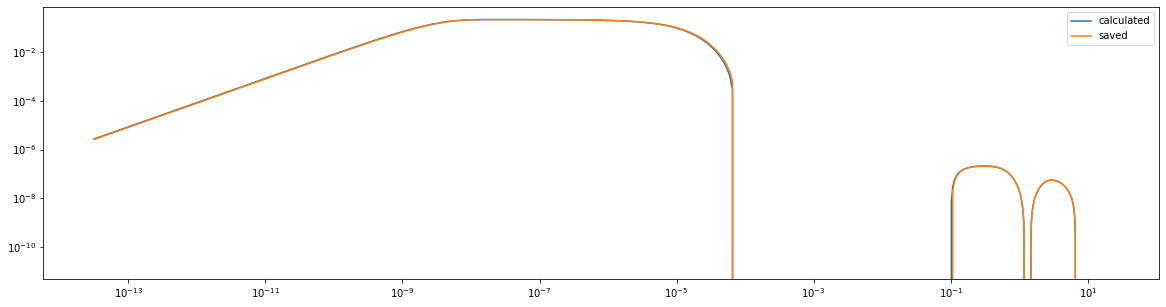

In [17]:
choice = "sh"
md= manual_deriv(graphtest[choice])
plt.figure(figsize=(20,5))
plt.plot(derivtest["t(Myrs)"][:-1],md,label="calculated")
plt.plot(derivtest["t(Myrs)"][:-1],derivtest[choice][:-1]*convfactor,label="saved")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [105]:
np.mean(derivtest[choice][:-1]/md)

3.166844441351664e-14

In [110]:
1/(3600*24*365*1e6)

3.1709791983764584e-14

3.1688765402688214e-14

In [20]:
!pip3 install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html


In [49]:
a = float("1.00E+004")

In [50]:
#int(a)

10000

In [51]:
a

10000.0